# 1. Import Dependencies

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

# 2. Load Image

In [2]:
IMG_PATH = os.path.join('data', 'mask.jpg')

In [3]:
img = cv2.imread(IMG_PATH)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [4]:
height, width, channels = img.shape
print(height, width, channels)

470 780 3


# 3. Resize
https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html

To shrink an image, it will generally look best with INTER_AREA interpolation, whereas to enlarge an image, it will generally look best with INTER_CUBIC (slow) or INTER_LINEAR (faster but still looks OK).

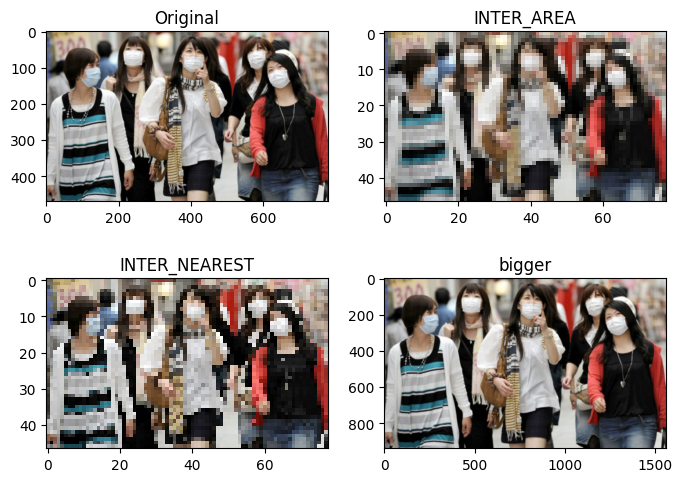

In [10]:
if img is not None:
    interpolation_area = cv2.resize(img,
                             (round(width/10), round(height/10)),
                              interpolation = cv2.INTER_AREA)
    
    interpolation_nearest = cv2.resize(img,
                                (round(width/10), round(height/10)),
                                 interpolation = cv2.INTER_NEAREST)
    
    bigger = cv2.resize(img,
                 (round(width*2), round(height*2)))
    
    titles = ['Original', 'INTER_AREA', "INTER_NEAREST", "bigger"]
    images = [img, interpolation_area, interpolation_nearest, bigger]
    count = 4
    
    plt.figure(figsize=(8,6),dpi=100)
    for i in range(count):
        plt.subplot(2, 2, i+1)
        plt.title(titles[i])
        plt.imshow(images[i])
    plt.show()
else:
    print("Check the file path again.")

# 4. Crop

In [2]:
refpt = [] #List of refrence points

def select_roi (event, x, y, flags, param):
    global refpt #Global refrences

    if event == cv2.EVENT_LBUTTONDOWN: # When the left mouse button is clicked
        refpt = [(x,y)]

    elif event == cv2.EVENT_LBUTTONUP: # When the left mouse button is released
        refpt.append((x,y)) # recording the last coordinates
        cv2.rectangle(img_main,refpt[0],refpt[1],(0,255,0),2)
        cv2.imshow("frame",img_main)
        print("Selection Successful")  

In [3]:
IMG_PATH = os.path.join('data', 'mask.jpg')
img = cv2.imread(IMG_PATH)
height, width, channels = img.shape

img_main = cv2.resize(img, (round(width*1.5), round(height*1.5)))

In [4]:
clone = img_main.copy() # To reset the image after cropping
clone2 = img_main.copy() # To crop a section out without affecting the original image

In [5]:
# create a black image, a window and bind the function to window
cv2.namedWindow("frame")
cv2.setMouseCallback("frame", select_roi)

i=1 # Numbering for saving images

while True:
    cv2.imshow("frame", img_main)
    var = cv2.waitKey(0)

    '''
    Instructions
    - Select a region , then press c to crop that portion.
    - Press r to reset your selection.
    - In the Crop mode , press s to save your cropped image or press r to reset selection
    - Press q to exit the program.
    '''

    if var == ord('c'): # Crop selected images
        
        if len(refpt)==2:
            roi = clone2[refpt[0][1]:refpt[1][1], refpt[0][0]:refpt[1][0]] # [y1:y2, x1:x2]
            cv2.namedWindow("Crop")
            cv2.imshow("Crop",roi)
            print("Cropped")

            var2 = cv2.waitKey(0)

            if var2 == ord('s'): # Saving cropped image
                cv2.imwrite("data/cropped_image{}.jpg".format(i),roi) # Name of the saved image 
                i=i+1
                print("image saved\n")
                cv2.destroyWindow("Crop") 
                img_main = clone.copy()
                
            elif var2 == ord('r'): # Reset
                cv2.destroyWindow("Crop")
                print("Reset\n")
                img_main = clone.copy()
    
    elif var == ord('r'): # Reset
        print("Reset\n")
        img_main = clone.copy()

    elif var == ord('q'): # Exit the loop
        print("Exiting ...")
        break

cv2.destroyAllWindows()

Selection Successful
Cropped
image saved

Selection Successful
Selection Successful
Exiting ...
